# Andres Graterol - 4031393 - Fall 22

# Homework 4 Question 1

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## Dataset Generation

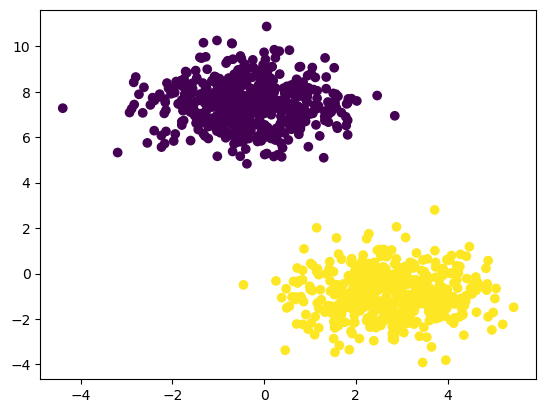

In [3]:
# Create 2D Gaussian Blobs
# Generate and plot 1000 samples from classes C1 and C2
X, y = make_blobs(n_samples=1000, centers=2)
plt.scatter(X[:,0], X[:,1], c=y)

In [4]:
# Obtain training and test data 
# 75/25 train/test split
y_true = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

#print("x train: ", X_train)
#print("shape of x:", X_train.shape)
print("t: ", y_train)
print("shape of t:", y_train.shape)

print("x test:", X_test)
print("shape of x test:", X_test.shape)

t:  [[0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 

## Least-squares Solution

In [5]:
# Create the matrix of augmented inputs 
def create_x_matrix(data_points):
    x_matrix = []
    
    for i in range(len(data_points)):
        row_array = [1, data_points[i][0], data_points[i][1]]
        x_matrix.append(row_array)
        
    x_matrix = np.array(x_matrix)
    
    return x_matrix

# Create the one hot encoding matrix
def create_t_matrix(labels):
    t_matrix = []
    
    for i in range(len(labels)):
        row_array = [1-labels[i], labels[i]]
        t_matrix.append(row_array)
        
    t_matrix = np.array(t_matrix)
    t_matrix = t_matrix.squeeze()
    
    return t_matrix

# Map a prediction to the class with the larger value
def map_to_class(prediction):
    if(prediction[0] > prediction[1]):
        # One-hot encoding for class 0
        prediction = [1, 0]
    else:
        # One-hot encoding for class 1
        prediction = [0, 1]
        
    return prediction;

# Compute the predictions and output them into an array
def compute_predictions(weights, test_data):
    prediction_matrix = []
    
    for i in range(len(test_data)):
        row_array = []
        xn = [1, test_data[i][0], test_data[i][1]]
        xn = np.array(xn)

        prediction = np.matmul(np.transpose(weights), xn)
        #print("prediction shape", prediction.shape)
        
        prediction = map_to_class(prediction)
        
        prediction_matrix.append(prediction)
        
    prediction_matrix = np.array(prediction_matrix)
    
    return prediction_matrix

def compute_test_accuracy(ground_truth, predictions):
    correct_count = 0;
    for i in range(len(ground_truth)):
        if(ground_truth[i][0] == predictions[i][0]):
            correct_count += 1
            
    accuracy = correct_count/len(predictions)
    
    return accuracy

In [6]:
X = create_x_matrix(X_train)
print("Shape of x matrix:", X.shape)

T = create_t_matrix(y_train)
print("Shape of t matrix:", T.shape)

weights = np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.matmul(np.transpose(X), T))
print("Shape of the weights:", weights.shape)

Shape of x matrix: (750, 3)
Shape of t matrix: (750, 2)
Shape of the weights: (3, 2)


In [7]:
labels = create_t_matrix(y_test)
print(labels)
#print("shape of test labels:", labels.shape)

predictions = compute_predictions(weights, X_test)
print(predictions)
#print("shape of predictions:", predictions.shape)

accuracy = compute_test_accuracy(labels, predictions)
print(accuracy)

[[1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]

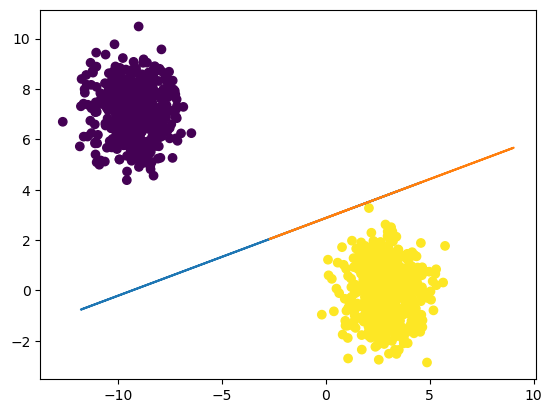

In [30]:
# Plotting the decision bondary 
# Column 1 (index 0) contains the 3 weights for the first class
# Column 2 (index 1) contains the 3 weights for the second class

#print(weights)
#print(weights[1][1])
slope = -(weights[1][0] - weights[1][1])/(weights[2][0] - weights[2][1])
intercept = -(weights[0][0] - weights[0][1])/(weights[2][0] - weights[2][1])

hyperplane = slope*X_test + intercept

plt.plot(X_test, hyperplane)
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
# Study the effect of outlier. Generate an additional blob of 50 points and add them to one of the classes


## FLD

[[-11.59354662   7.98885516]
 [ -9.0915453    8.6699763 ]
 [ -8.28673954   8.76480995]
 ...
 [-10.01835048   6.74590417]
 [ -9.1554304    7.57928872]
 [ -8.34712017   6.09750014]]
[0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1
 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0
 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1
 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0
 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0
 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0
 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0

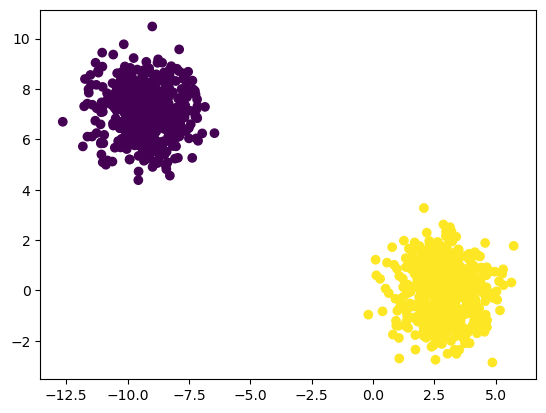

In [18]:
# Generate the blobs as before 
X, y = make_blobs(n_samples=1000, centers=2)
print(X)
print(y)
plt.scatter(X[:,0], X[:,1], c=y)

y_true = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

In [23]:
#print(X_train)
#print(y.shape)
#print(y)
print(np.where(y==1))



count_arr = np.bincount(y)

N1 = count_arr[0]
print("Number of items in class 0:", N1)
N2 = count_arr[1]
print("Number of items in class 1:", N2)

class1_sum = np.zeros(2)
class2_sum = np.zeros(2)
for i in range(len(X_train)):
    # Add values to class 1
    if (i in np.where(y==0)):
        class1_sum = np.add(class1_sum, X_train[i])
        
    # Add values to class 2   
    else:
        class2_sum = np.add(class2_sum, X_train[i])
        
print(class1_sum)
print(class2_sum)

(array([  3,   6,   7,   8,  12,  13,  14,  15,  16,  18,  19,  28,  31,
        33,  34,  37,  38,  39,  43,  44,  46,  47,  50,  53,  54,  56,
        57,  59,  68,  69,  70,  71,  72,  75,  82,  83,  85,  86,  89,
        90,  95,  96,  98, 102, 103, 104, 109, 110, 111, 112, 113, 114,
       116, 118, 119, 121, 126, 127, 129, 131, 132, 133, 135, 136, 137,
       139, 141, 142, 144, 146, 149, 150, 151, 157, 158, 160, 162, 163,
       164, 165, 168, 169, 170, 171, 174, 175, 176, 177, 179, 182, 184,
       186, 187, 188, 190, 192, 199, 200, 202, 205, 207, 211, 212, 216,
       217, 218, 219, 220, 221, 224, 225, 226, 228, 229, 230, 231, 232,
       234, 238, 240, 241, 243, 244, 245, 246, 247, 248, 250, 251, 252,
       253, 254, 256, 257, 258, 259, 260, 261, 262, 264, 266, 267, 269,
       270, 271, 272, 279, 281, 282, 286, 287, 289, 290, 291, 292, 293,
       294, 297, 301, 303, 305, 306, 308, 310, 313, 314, 318, 321, 322,
       323, 324, 327, 328, 329, 331, 336, 337, 338, 339, 341, 3

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()